In [1]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data, labels = datasets.make_blobs(n_samples = 200, n_features=3,centers=3 ,random_state=20)
data,data_test,labels,labels_test = train_test_split(data,labels,test_size = 0.2,shuffle=True)
data.shape, data_test.shape, labels.shape, labels_test.shape
data[1,:],labels[1]

(array([ 2.76802596, 10.08132367,  8.3969008 ]), 0)

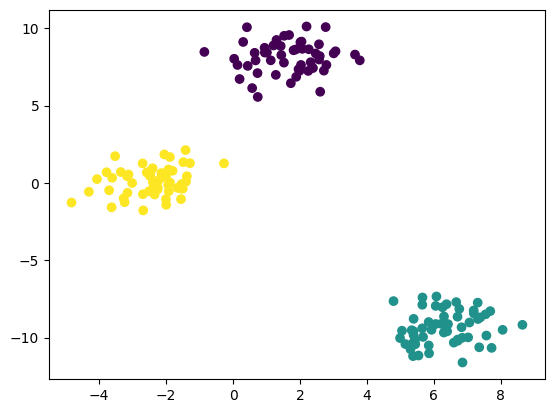

In [3]:
plt.scatter(data[:,0], data[:,1],c = labels)

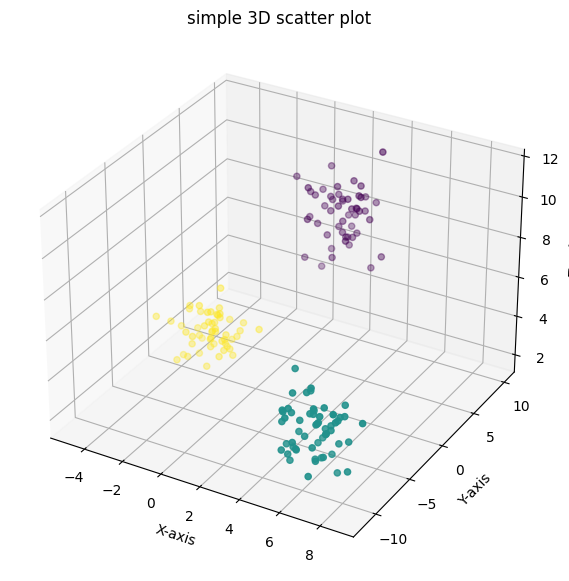

In [4]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(data[:,0], data[:,1], data[:,2], c = labels)
plt.title("simple 3D scatter plot")

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
 
# show plot
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data, labels)
neigh.predict([[7,8,3],[-100,-100,100],[-100,20,0]])

array([0, 1, 2])

In [6]:
class KNN_classifier:
    def __init__(self,k_neighbours):
        self.k_neighbours=k_neighbours

    def minkowski(self,x1,x2,p=2):
        return (sum([(abs(x1[i]-x2[i]))**p for i in range(len(x1))]))**(1/p)
            
    def fit(self,X,y):
        self.X = X
        self.y = y
    
    def predict(self,x_test,p=2):
        distances = []
        for train_id in range(len(self.X)):
            try:
                if len(x_test) != len(self.X[train_id]):
                    raise Exception
                distances.append([self.minkowski(x_test,self.X[train_id],p), self.y[train_id]])
            except:
                print("Length of train data and prediction data not matching")
                break
        
        distances.sort(key = lambda tup: tup[0], reverse=True)
        
        pred =[]
        temp =[]
        for j in distances[:self.k_neighbours]:
            temp.append(j[1])

        freq = dict((i, temp.count(i)) for i in set(temp))
        ls = list(freq.items())
        ls.sort(key = lambda tup: tup[1], reverse=True)
        pred.append(ls[0][0])
        return pred            
    

In [7]:
classifier = KNN_classifier(10)
classifier.fit(data,labels)
x_test = [[7,8,3],[-100,-100,100],[-100,20,0]]

for i in x_test:
    print(classifier.predict(i))

[1]
[0]
[1]
